Our Groups Goal!

Label + Data Integrity/ISRC

-number of streams by label

-country, year, registrant, random code

-use artist, title, songwriter to identify duplicate ISRC

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
music_df = pd.read_csv("..\data\Matching_MLC Data Sample.csv")
print(music_df)

                If  Country Code Registrant Code  Year of Reference  \
0      USUG12101043           US             UG1               21.0   
1      USRC12100543           US             RC1               21.0   
2      USSM12102263           US             SM1               21.0   
3      USLD91731547           US             LD9               17.0   
4      USAT22007048           US             AT2               20.0   
...             ...          ...             ...                ...   
99995  QZK6F2019397           QZ             K6F               20.0   
99996  QZK6F2019397           QZ             K6F               20.0   
99997  SE6HN1926755           SE             6HN               19.0   
99998  SEYOK1669274           SE             YOK               16.0   
99999  QZK6F2019397           QZ             K6F               20.0   

      Usage Period Streaming Platform (DSP)     Streams  \
0              NaN                AudioMack     10,175    
1              NaN           

In [7]:
music_df.head(20)

,If,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,"8,133",x0o0x_,x0o0x_,______,______,142,0
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,"5,839",Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1
7,QMJMT2103634,QM,JMT,21.0,2/1/2021,Amazon,"7,842",NF,NF Real Music,-Interlude-,The Search,49,0
8,USRC12100543,US,RC1,21.0,3/1/2021,Spotify,"28,419",2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1
9,USAT22007048,US,AT2,20.0,3/1/2021,Spotify,"28,419",2worth,die happy <3,¡!gu4na:D////:>_<^^,¡!gu4na:D////:>_<^^,126,1


In [8]:
music_df = music_df.rename(columns = {'If ':'ISRC'})
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   ISRC                                       98240 non-null   object 
 1   Country Code                               98303 non-null   object 
 2   Registrant Code                            98303 non-null   object 
 3   Year of Reference                          98239 non-null   float64
 4   Usage Period                               91898 non-null   object 
 5   Streaming Platform (DSP)                   96001 non-null   object 
 6   Streams                                    100000 non-null  object 
 7   Recording Artist                           100000 non-null  object 
 8   Recording Label                            98992 non-null   object 
 9   Recording Title                            100000 non-null  object 
 10  Release T

In [9]:
#music_df['Year of Reference'] = music_df['Year of Reference'].fillna('')

In [10]:
music_df['Year of Reference'] = music_df['Year of Reference'].fillna('')
#music_df('Year of Reference') = music_df('Year of Reference').astype(int) 

In [11]:
music_df['Streams'] = music_df['Streams'].astype(str)
music_df['Streams'] = music_df['Streams'].str.replace(',','')
music_df['Streams'] = music_df['Streams'].astype(int)

In [12]:
music_df.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [13]:
music_null = music_df[music_df.isna().any(axis=1)]
music_null.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,10175,Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,62105,Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0
26,GBAHS2100229,GB,AHS,21.0,NaN,YouTube,12560,Bad Bunny|Benito Antonio Martinez,Rimas Entertainment LLC,¿Quien Tu Eres?,X 100PRE,160,0


## Nathan's code to remove null values

In [14]:
music_df["ISRC"].fillna(" ", inplace = True)
music_df["Country Code"].fillna(" ", inplace = True)
music_df["Registrant Code"].fillna(" ", inplace = True)
music_df["Year of Reference"].fillna(" ", inplace = True)
music_df["Usage Period"].fillna(" ", inplace = True)
music_df["Streaming Platform (DSP)"].fillna(" ", inplace = True)
music_df["Streams"].fillna(" ", inplace = True)
music_df["Recording Artist"].fillna(" ", inplace = True)
music_df["Recording Label"].fillna(" ", inplace = True)
music_df["Recording Title"].fillna(" ", inplace = True)
music_df["Release Title"].fillna(" ", inplace = True)
music_df["Recording Duration (Seconds)"].fillna(" ", inplace = True)

In [15]:
music_df.isnull().sum()

ISRC                                         0
Country Code                                 0
Registrant Code                              0
Year of Reference                            0
Usage Period                                 0
Streaming Platform (DSP)                     0
Streams                                      0
Recording Artist                             0
Recording Label                              0
Recording Title                              0
Release Title                                0
Recording Duration (Seconds)                 0
Songwriter's Listed (1 = "Yes", 0 = "No")    0
dtype: int64

In [16]:
music_df = music_df.set_axis(["ISRC","Country","Registrant","Year","UsePeriod","Platform","Streams","Artist","Label","RecordingName","ReleaseName","Length","ListsWriters"], axis=1)

In [17]:
#music_df.head(10)

In [18]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ISRC           100000 non-null  object
 1   Country        100000 non-null  object
 2   Registrant     100000 non-null  object
 3   Year           100000 non-null  object
 4   UsePeriod      100000 non-null  object
 5   Platform       100000 non-null  object
 6   Streams        100000 non-null  int32 
 7   Artist         100000 non-null  object
 8   Label          100000 non-null  object
 9   RecordingName  100000 non-null  object
 10  ReleaseName    100000 non-null  object
 11  Length         100000 non-null  int64 
 12  ListsWriters   100000 non-null  int64 
dtypes: int32(1), int64(2), object(10)
memory usage: 9.5+ MB


In [19]:
music_df['Year'] = music_df['Year'].fillna('')
#music_df['Year'] = music_df['Year'].astype(int) 

In [20]:
music_df.describe()

,Streams,Length,ListsWriters
count,1.000000e+05,100000.000000,100000.000000
mean,5.626550e+04,1016.893690,0.541610
std,2.620276e+05,15565.692133,0.498268
min,1.000000e+00,0.000000,0.000000
25%,6.807000e+03,149.000000,0.000000
50%,1.677250e+04,190.000000,1.000000
75%,3.990300e+04,236.000000,1.000000
max,2.145617e+07,818738.000000,1.000000


In [21]:
music_df.head()

,ISRC,Country,Registrant,Year,UsePeriod,Platform,Streams,Artist,Label,RecordingName,ReleaseName,Length,ListsWriters
0,USUG12101043,US,UG1,21.0,,AudioMack,10175,Future,,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,,AudioMack,62105,Foolio,,WHEN I SEE YOU REMIX,#unknown#,187,0


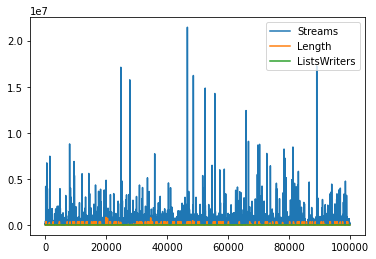

In [22]:
music_df.plot();

In [23]:
#sns.set(style="ticks", color_codes=True)

#sns.pairplot(music_df);

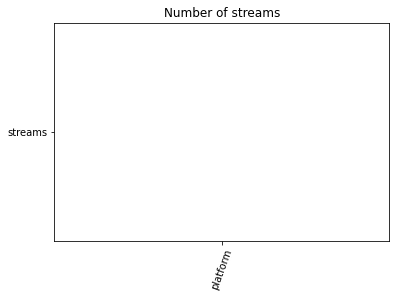

In [24]:
plt.bar('platform', 'streams', data = music_df)
plt.xticks(rotation = 70)
plt.title('Number of streams');

In [25]:
#platform = music_df.pd.unique('platform')
#print(platform)

In [26]:
indie = music_df[music_df['Artist'] == music_df['Label']]
indie.head()

,ISRC,Country,Registrant,Year,UsePeriod,Platform,Streams,Artist,Label,RecordingName,ReleaseName,Length,ListsWriters
1,USRC12100543,US,RC1,21.0,,SoundCloud,8597,LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,,SoundCloud,261280,LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
5,QZJ842000983,QZ,J84,20.0,3/1/2021,Spotify,8133,x0o0x_,x0o0x_,______,______,142,0
20,TCAFA2064435,TC,AFA,20.0,3/1/2021,Spotify,14496,"Daniel, Me Estás Matando","Daniel, Me Estás Matando",¿Qué Se Siente Que Me Gustes Tanto?,Suspiros,185,1
21,USUG12100638,US,UG1,21.0,1/1/2021,Pandora,16935,Cultura Profética,Cultura Profética,¿Qué Será? / Ritmo Que Pesa / Suelta los Amarr...,Single::¿Qué Será? / Ritmo Que Pesa / Suelta l...,834,0


In [27]:
not_indie = music_df[music_df['Artist'] != music_df['Label']]
not_indie.head()

,ISRC,Country,Registrant,Year,UsePeriod,Platform,Streams,Artist,Label,RecordingName,ReleaseName,Length,ListsWriters
0,USUG12101043,US,UG1,21.0,,AudioMack,10175,Future,,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,,AudioMack,62105,Foolio,,WHEN I SEE YOU REMIX,#unknown#,187,0
6,USUG12100126,US,UG1,21.0,3/1/2021,Apple,5839,Quentin Miller,1317 Recordings,_A_ (feat. Pe$o),Q.M.,199,1
7,QMJMT2103634,QM,JMT,21.0,2/1/2021,Amazon,7842,NF,NF Real Music,-Interlude-,The Search,49,0


In [28]:
for col in music_df:
  print(music_df[col].unique())

['USUG12101043' 'USRC12100543' 'USSM12102263' ... 'USFZH2100006'
 'QZFYY2115255' 'GBSMU8171946']
['US' 'QZ' 'QM' 'TC' 'GB' ' ' 'DE' 'UK' 'KR' 'AU' 'MX' 'CA' 'HK' 'NL' 'JP'
 'JM' 'SE' 'IE' 'ZZ' 'DG' 'FR' 'AE' 'GM' 'IT' 'DK' 'NO' 'CH' 'UY' 'AT'
 'IN' 'CY' 'AR' 'TW' 'ZA' 'PH' 'BE' 'NG' 'RU' 'ES' 'VN' 'BR' 'PL' 'CO'
 'BX' 'ID' 'CN' 'CB' 'FI' 'IL' 'NZ' 'PE' 'MG' 'GZ' 'LS' 'EE' 'NU' 'IS'
 'PR' 'CI' 'HU' '19' 'PT' 'LB' 'GR' 'BG' 'EG' 'CL' 'DO' 'BC' 'WW' 'BA'
 'AY' 'QA' 'FX' 'CZ' '85' 'BO' 'GX']
['UG1' 'RC1' 'SM1' ... 'F70' 'ASH' 'Y03']
[21.0 17.0 20.0 13.0 '' 15.0 19.0 18.0 16.0 11.0 81.0 6.0 12.0 14.0 10.0
 0.0 4.0 9.0 2.0 5.0 79.0 3.0 96.0 1.0 99.0 65.0 8.0 93.0 97.0 98.0 7.0
 87.0 82.0 61.0 84.0 26.0 88.0 92.0 73.0 22.0 89.0 75.0 86.0 94.0 78.0
 95.0 69.0 91.0 77.0 71.0 80.0 58.0 33.0 72.0 68.0 85.0 90.0 76.0 63.0
 47.0 83.0 55.0 70.0 64.0 74.0 60.0 30.0 34.0 41.0 57.0 66.0 35.0 62.0
 24.0 56.0 67.0 39.0 23.0 54.0 53.0 59.0 51.0 25.0 36.0 37.0 42.0 28.0
 50.0 52.0 44.0 49.0 38.0 48.0 32.0 

In [29]:
platform_list = music_df.Platform.unique()
print(platform_list)

['AudioMack' 'SoundCloud' 'Trebel' 'Spotify' 'Apple' 'Amazon' 'Pandora'
 'YouTube' ' ' 'Tidal' 'iHeart Radio' 'Melodyv' 'Deezer' 'GTL' 'LiveXLive'
 'NugsNet' 'Midwest Tape' 'Ultimate Guitar' 'Qoboz' 'Anghami' 'Pacemaker'
 'PowerMusic' 'Wolfgangs' 'Recisio' 'Sonos' 'Smithsonian' 'Fan Label'
 'MixCloud' 'MonkingMe' 'Classical Archives']


In [30]:
music_df.groupby('Platform')['Streams'].sum()

Platform
                      4.703908e+07
Amazon                1.511998e+08
Anghami               3.468200e+04
Apple                 1.606454e+09
AudioMack             1.199156e+07
Classical Archives    2.000000e+01
Deezer                8.783000e+04
Fan Label             9.100000e+01
GTL                   1.280764e+06
LiveXLive             1.013070e+05
Melodyv               5.384657e+06
Midwest Tape          8.570800e+04
MixCloud              2.661000e+03
MonkingMe             3.549000e+03
NugsNet               1.107090e+05
Pacemaker             1.707000e+03
Pandora               8.742366e+08
PowerMusic            3.154000e+03
Qoboz                 6.621000e+03
Recisio               2.900000e+01
Smithsonian           2.080000e+02
Sonos                 3.140200e+04
SoundCloud            1.668138e+08
Spotify               2.552564e+09
Tidal                 4.879313e+07
Trebel                1.493470e+05
Ultimate Guitar       3.090000e+02
Wolfgangs             9.650000e+02
YouTube    

In [31]:
music_df=music_df.set_axis(["ISRC","Country","Registrant","Year","Month_Streamed",
                            "Platform","Streams","Artist","Label","Recording_Title","Release_Title",
                            "Duration_Sec","Songwriter_Listed"], axis=1)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISRC               100000 non-null  object
 1   Country            100000 non-null  object
 2   Registrant         100000 non-null  object
 3   Year               100000 non-null  object
 4   Month_Streamed     100000 non-null  object
 5   Platform           100000 non-null  object
 6   Streams            100000 non-null  int32 
 7   Artist             100000 non-null  object
 8   Label              100000 non-null  object
 9   Recording_Title    100000 non-null  object
 10  Release_Title      100000 non-null  object
 11  Duration_Sec       100000 non-null  int64 
 12  Songwriter_Listed  100000 non-null  int64 
dtypes: int32(1), int64(2), object(10)
memory usage: 9.5+ MB
